# Data loader
data in /dds/workspace/data_ja/

In [1]:
!ls /dds/workspace/data_ja/

CAT_1_9013.jpg	    CAT_1_9024.jpg	cat.jpg      test.jpg
CAT_1_9013.jpg.ppm  CAT_1_9024.jpg.ppm	cat.jpg.ppm  test.jpg.ppm


### fonction de chargement d'image jpeg par morceau

In [2]:
from PIL import Image
Image.MAX_IMAGE_PIXELS = 1e10
# ImageFile.LOAD_TRUNCATED_IMAGES = True

import os.path
import numpy as np
import glob

def change_tile(tile, new_width, new_height, memory_offset):
    tup = tile[0]
    return [(tup[0],) + ((0,0,new_width, new_height),) + (tup[-2]+memory_offset,) + (tup[-1],)]

def read_line_portion(img_path,x,y,w,h,i):
    img_pil = Image.open(img_path)
    W = img_pil.size[0]
    img_pil.size=(w,1)
    memory_offset = (x+i)*3*W+3*y
    img_pil.tile = change_tile(img_pil.tile,w,1,memory_offset)
    #print(img_pil.tile)
    #print(img_pil.size)
    return img_pil

def read_from_memory(img_path,x,y,w,h):
    result = Image.new('RGB',(w,h))
    for i in range(h):
        a = read_line_portion(img_path, x,y,w,h,i)
        result.paste(a,(0,i))
    return result

def show_thumbnail(img_pil, max_size_thumbnail = 200):
    img_pil_thumbnail = img_pil.copy()
    size = img_pil.size
    max_size_img = float(max(size))
    new_size =  tuple((max_size_thumbnail/max_size_img*np.asarray(result.size)).astype(int))
    img_pil_thumbnail.thumbnail(new_size, Image.ANTIALIAS)
    return img_pil_thumbnail

def convert_to_ppm(img_path):
    
    if os.path.isfile(img_path):
        if img_path[-3:]!="ppm":
            #print('not ppm')
            if os.path.isfile(img_path+".ppm"):
                #print('converted file already exist')
                pass
            else:
                #print("conversion... ["+"convert" +img_path+" "+img_path+".ppm"+"]")
                os.system("convert " +img_path+" "+img_path+".ppm")  
                #print("conversion done !")
        else:
            #print("file already converted")
            pass
    else:
        #print("file does not exist")
        pass

def purge_ppm(folder):
    os.system("rm "+folder+"/*.ppm")
def list_all_images(folder,extensions = ['jpg','jpeg','JPG','JPEG']):
    directoryPath  = folder+"/*."
    fileExtensions = [ "jpg", "jpeg", "png", "bmp", "gif" ]
    listOfFiles    = []
    list_files = []
    for extension in fileExtensions:
        listOfFiles.extend( glob.glob( directoryPath + extension ))
    return listOfFiles


# lister les images
# convertir celles qui ne le sont pas


### Generation des images avec un encodage de type "raw" (conversion au format "ppm")

In [3]:
folder = "/dds/workspace/data_ja"

#purge_ppm(folder)
list_images_path = list_all_images(folder)
for img_path in list_images_path:
    convert_to_ppm(img_path)
!ls /dds/workspace/data_ja/ -hl |grep ppm

-rw-r--r-- 1 root root 1.6G Feb 21 16:00 CAT_1_9013.jpg.ppm
-rw-r--r-- 1 root root 1.5G Feb 21 16:01 CAT_1_9024.jpg.ppm
-rw-r--r-- 1 root root 1.6G Feb 21 16:00 cat.jpg.ppm
-rw-r--r-- 1 root root 647K Feb 21 16:01 test.jpg.ppm


### Génération d'une liste de crops aléatoires, multiscales, multisources

### Affichages de quelques exemples de crops

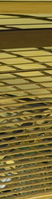

In [4]:
#(960, 230)
x = 100
y = 800
h = 2300
w = 600

img_path = '/dds/workspace/data_ja/cat.jpg.ppm'
result = read_from_memory(img_path,x,y,w,h)
show_thumbnail(result)
    
